In [ ]:
!pip install tensorflow==2.6.0
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install tensorflow==2.6.0 keras==2.6.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import metrics
import tensorflow as tf

# 데이터 경로
train_dir = '/content/drive/MyDrive/data_BC_10Class/train'
val_dir = '/content/drive/MyDrive/data_BC_10Class/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet50 모델 불러오기
resnet = ResNet50(input_shape=(img_size[0], img_size[1], img_channel), weights='imagenet', include_top=False) # ImageNet으로 사전 학습된 가중치를 초기 가중치로 사용

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 학습률 스케줄링 콜백 설정
lr_scheduler = LearningRateScheduler(scheduler)

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True, # 가장 성능이 좋은 가중치 저장 여부
    save_weights_only=True, # 모델, 가중치 저장 선택
    verbose=1)

# 조기 종료 콜백 설정
#early_stopping_callback = EarlyStopping(
#    monitor='val_loss',
#    patience=5, # val_loss가 최소 5 epoch 동안 개선되지 않으면 학습 중단
#    restore_best_weights=True) # 가장 성능이 좋은 가중치 복원 여부

# 모델 학습
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, lr_scheduler])

Found 8663 images belonging to 10 classes.
Found 2527 images belonging to 10 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/30
542/542 [==============================] - ETA: 0s - loss: 1.5971 - accuracy: 0.4403 - precision: 0.7518 - recall: 0.3035
Epoch 1: val_loss improved from inf to 2.40509, saving model to /content/drive/MyDrive/checkpoint/model-001.h5
542/542 [==============================] - 3395s 6s/step - loss: 1.5971 - accuracy: 0.4403 - precision: 0.7518 - recall: 0.3035 - val_loss: 2.4051 - val_accuracy: 0.1239 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/30
542/542 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.9215 - precision: 0.9359 - recall: 0.9070
Epoch 2: val_loss improved from 2.40509 to 0.56177, saving model to /content/drive/MyDrive/checkpoint/model-002.h5
542/542 [==============================] - 506s 933ms/step - loss: 0.2709 - accuracy: 0.9215 - precision: 0.9359 - recall

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import metrics
import tensorflow as tf

# 데이터 경로
train_dir = '/content/drive/MyDrive/data_ABC_10Class/train'
val_dir = '/content/drive/MyDrive/data_ABC_10Class/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet50 모델 불러오기
resnet = ResNet50(input_shape=(img_size[0], img_size[1], img_channel), weights=None, include_top=False)

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 옵티마이저 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=4.0657e-04)

# 이전에 저장된 모델 가중치 불러오기
model.load_weights('/content/drive/MyDrive/checkpoint/model-018.h5') # 경로 작성

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 학습률 스케줄링 콜백 설정
lr_scheduler = LearningRateScheduler(scheduler)

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True, # 가장 성능이 좋은 가중치 저장 여부
    save_weights_only=True, # 모델, 가중치 저장 선택
    verbose=1)

# 학습 이어서 시작
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, lr_scheduler],
          initial_epoch=18) # initial_epoch = 이전에 중단된 epoch 숫자

In [ ]:
# 구글 드라이브에 모델 저장
model.save('/content/drive/MyDrive/ResNet50_data_BC_10Class.h5')

In [ ]:
import matplotlib.pyplot as plt

accuracy = [0.1612, 0.2880, 0.5788, 0.8777, 0.9393, 0.9565, 0.9613, 0.9659, 0.9694, 0.9737, 0.9802, 0.9851, 0.9878, 0.9848, 0.9909, 0.9922, 0.9921, 0.9944, 0.9957, 0.9960, 0.9955, 0.9975, 0.9978, 0.9973, 0.9978, 0.9975, 0.9983, 0.9984, 0.9987, 0.9988]
loss = [2.2635, 1.7504, 1.0953, 0.4065, 0.2149, 0.1572, 0.1382, 0.1174, 0.1048, 0.0944, 0.0727, 0.0558, 0.0447, 0.0542, 0.0298, 0.0287, 0.0315, 0.0201, 0.0187, 0.0151, 0.0184, 0.0082, 0.0092, 0.0089, 0.0082, 0.0087, 0.0054, 0.0049, 0.0050, 0.0039]
val_accuracy = [0.2450, 0.2270, 0.7074, 0.8579, 0.7481, 0.8174, 0.9526, 0.8218, 0.7102, 0.4479, 0.9918, 0.9952, 0.9837, 1.0000, 0.8665, 0.6974, 0.9962, 1.0000, 0.9829, 1.0000, 1.0000, 1.0000, 0.9998, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 0.9998, 1.0000, 1.0000]
val_loss = [2.0576, 4.2954, 0.8754, 0.4985, 0.7968, 0.6250, 0.1515, 0.6051, 1.9441, 2.3330, 0.0266, 0.0200, 0.0668, 2.8964e-04, 0.4952, 1.1012, 0.0157, 1.0339e-05, 1.8901e-04, 1.6267e-06, 1.6670e-05, 6.8720e-04, 3.4589e-04, 6.0602e-05, 7.4301e-06, 1.2341e-05, 3.7875e-07, 0.0015, 1.9226e-06, 2.5836e-07]

# 정확도 그래프
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.show()

# 손실 그래프
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 5)
plt.show()

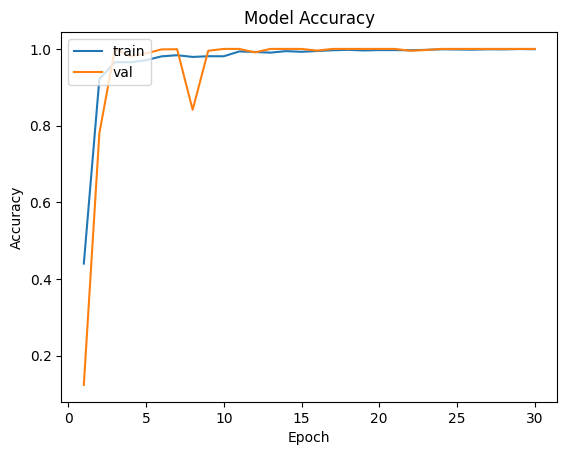

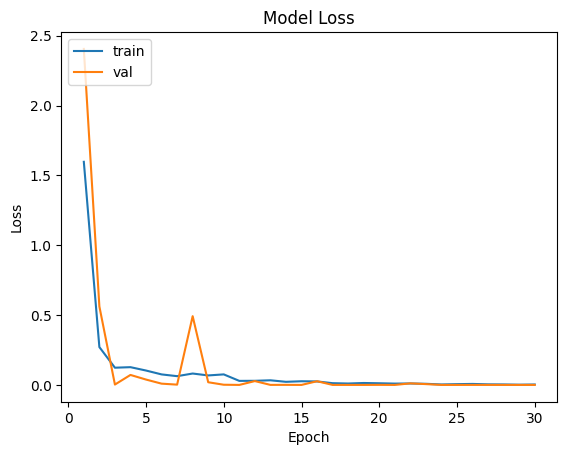

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

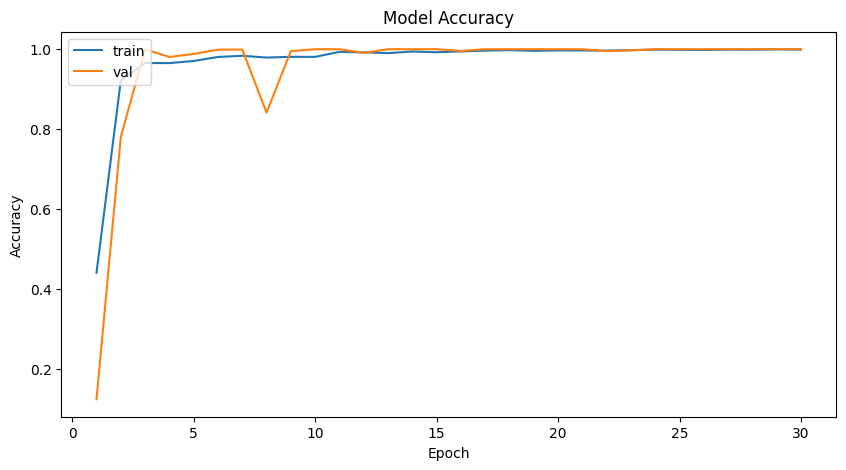

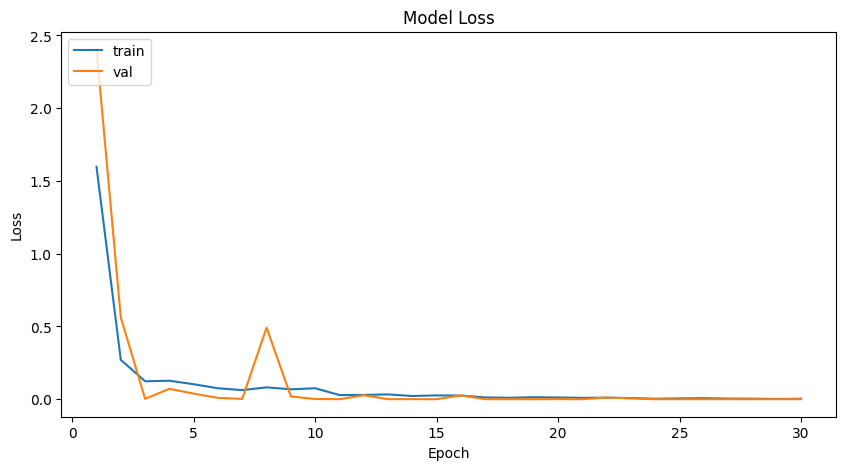

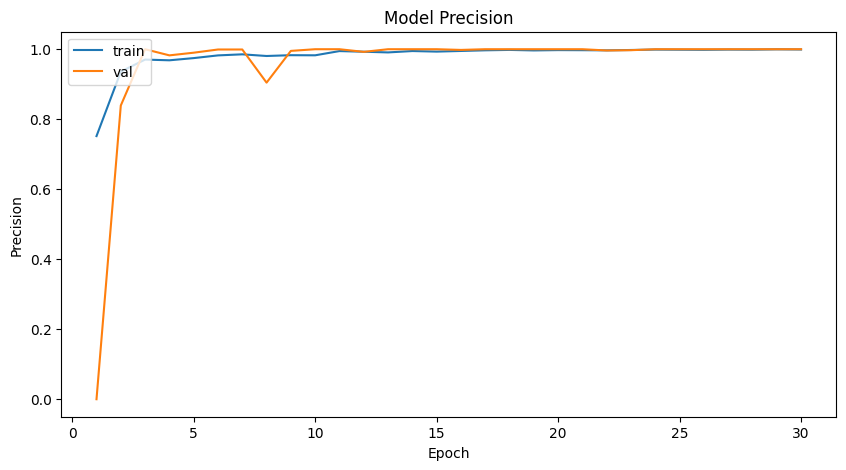

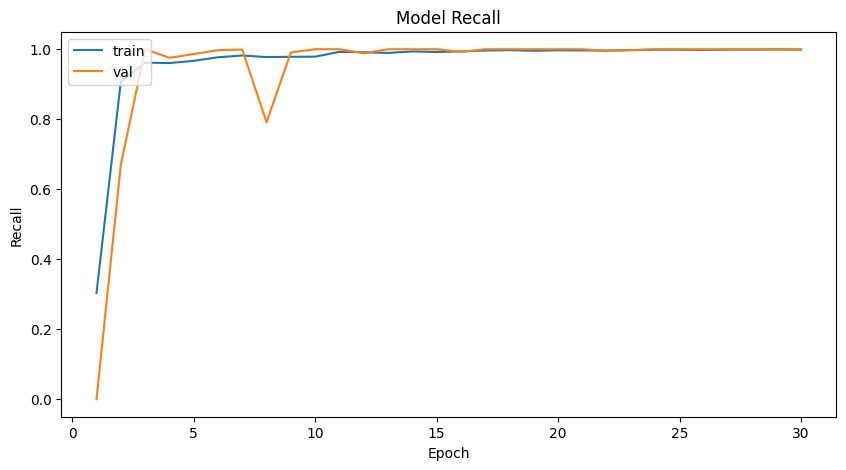

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['precision'])
plt.plot(epoch_range, history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['recall'])
plt.plot(epoch_range, history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 전체 데이터 세트 중 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/data_BC_10Class/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_BC_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

Found 1309 images belonging to 10 classes.
1309/1309 [==============================] - 351s 267ms/step
테스트 결과
---------------------
back/back_left1182.jpg : back
back/back_left1183.jpg : back
back/back_left1184.jpg : back
back/back_left1185.jpg : back
back/back_left1186.jpg : back
back/back_left1187.jpg : back
back/back_left1188.jpg : back
back/back_left1189.jpg : back
back/back_left1190.jpg : back
back/back_left1191.jpg : back
back/back_left1192.jpg : back
back/back_left1193.jpg : back
back/back_left1194.jpg : back
back/back_left1195.jpg : back
back/back_left1196.jpg : back
back/back_left1197.jpg : back
back/back_left1198.jpg : back
back/back_left1199.jpg : back
back/back_left1200.jpg : back
back/back_left1201.jpg : back
back/back_left1202.jpg : back
back/back_left1203.jpg : back
back/back_left1204.jpg : back
back/back_left1205.jpg : back
back/back_left1206.jpg : back
back/back_left1207.jpg : back
back/back_left1208.jpg : back
back/back_left1209.jpg : back
back/back_left1210.jpg : ba

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# D+E 테스트 데이터세트 폴더 경로
test_dir = '/content/drive/MyDrive/data_DE_10Class/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_BC_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

Found 1090 images belonging to 10 classes.
1090/1090 [==============================] - 297s 272ms/step
테스트 결과
---------------------
back/back_left_D0.jpg : right
back/back_left_D10.jpg : right
back/back_left_D100.jpg : right
back/back_left_D108.jpg : right
back/back_left_D118.jpg : right
back/back_left_D140.jpg : left
back/back_left_D146.jpg : left
back/back_left_D151.jpg : right
back/back_left_D154.jpg : right
back/back_left_D17.jpg : right
back/back_left_D171.jpg : right
back/back_left_D18.jpg : right
back/back_left_D19.jpg : right
back/back_left_D191.jpg : right
back/back_left_D196.jpg : right
back/back_left_D2.jpg : right
back/back_left_D208.jpg : right
back/back_left_D217.jpg : right
back/back_left_D260.jpg : right
back/back_left_D275.jpg : right
back/back_left_D310.jpg : right
back/back_left_D319.jpg : right
back/back_left_D45.jpg : right
back/back_left_D46.jpg : right
back/back_left_D48.jpg : right
back/back_left_D5.jpg : right
back/back_left_D53.jpg : right
back/back_left_D62.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# E 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/testdata_E_10Class'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_ABC_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 4월에 찍은 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/testdata'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_BCD_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# D 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/testdata_D'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_BCD_10Class.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))